# Association Rule Generation from Transaction Data

## Objective
The goal of this assignment is to practice generating association rules from a transaction dataset using the `mlxtend` library in Python.

## Instructions

### Part A: Downloading the Dataset
1. **Download the transaction dataset to your local drive.**
    - Go to the [Google Drive link](https://drive.google.com/drive/folders/1LuFEbgq3IvisEXT1jOZ-H4jWeqzqEH3m?usp=sharing). You must be logged in to your Rowan account to access this link.
    - Download the 'Grocery Items {DATASET NUMBER}.csv' file. Replace {DATASET NUMBER} with the number assigned to you earlier in the semester.

### Part B: Association Rule Mining
2. **Association Rule Generation**
    - **(a)** Using `mlxtend`, load the dataset and preprocess it to transform it into a suitable format for association rule mining.
    - **(b)** Generate association rules from the dataset using the following parameters:
        - Minimum support: 0.01
        - Minimum confidence threshold: 0.1
    - **(c)** Document the association rules that you are able to extract from your dataset.

### Part C: Analysis with Different Support and Confidence Levels
3. **Analyzing with Different Thresholds**
    - **(a)** Use the following minimum support values (msv): 0.001, 0.005, 0.01, 0.05
    - **(b)** Use the following minimum confidence thresholds (mct): 0.05, 0.075, 0.1
    - **(c)** For each pair (msv, mct), find the number of association rules extracted from the dataset.
    - **(d)** Construct a heatmap using Seaborn to show the count results. Ensure the x-axis represents msv and the y-axis represents mct.

### Part D: Finding High Confidence Rules
4. **High Confidence Rules**
    - **(a)** List the association rule(s) that have the highest confidence for a minimum support of 0.005.
    - **(b)** Document the confidence value of these rules.

In [2]:
import warnings
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore', category=DeprecationWarning)

class AssociationRuleMiner:
    def __init__(self, file_path):
        self.file_path = file_path
        self.one_hot_df = None
        self.transactions = None
        self.load_and_preprocess_data()

    def load_and_preprocess_data(self):
        df = pd.read_csv(self.file_path)

        self.transactions = df.apply(lambda x: [str(item) for item in x if pd.notnull(item)], axis=1).tolist()

        encoder = TransactionEncoder()
        one_hot_encoded = encoder.fit(self.transactions).transform(self.transactions)
        self.one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.columns_)

    def generate_rules(self, min_support=0.01, min_confidence=0.1):
        frequent_itemsets = apriori(self.one_hot_df, min_support=min_support, use_colnames=True)

        return association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

    def analyze_different_thresholds(self, support_values, confidence_values):
        # Initialize a DataFrame to store the counts
        counts_df = pd.DataFrame(index=confidence_values, columns=support_values)

        # Iterate over each combination of support and confidence
        for support in support_values:
            frequent_itemsets = apriori(self.one_hot_df, min_support=support, use_colnames=True)
            for confidence in confidence_values:
                rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
                counts_df.at[confidence, support] = len(rules)

        return counts_df

    @staticmethod
    def plot_heatmap(counts_df):
        plt.figure(figsize=(10, 6))
        sns.heatmap(counts_df.astype(int), annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Number of Rules'})
        plt.title('Number of Association Rules for different Support and Confidence Levels')
        plt.xlabel('Minimum Support Value (msv)')
        plt.ylabel('Minimum Confidence Threshold (mct)')
        plt.show()

    def find_high_confidence_rules(self, min_support=0.005):
        frequent_itemsets = apriori(self.one_hot_df, min_support=min_support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)
        highest_confidence_rules = rules[rules['confidence'] == rules['confidence'].max()]

        return highest_confidence_rules, rules['confidence'].max()

file_path = 'Grocery_Items_29.csv'
miner = AssociationRuleMiner(file_path)

In [3]:
# Part B
rules = miner.generate_rules()
print(rules)

          antecedents   consequents  antecedent support  consequent support  \
0  (other vegetables)  (whole milk)            0.123625              0.1615   
1        (rolls/buns)  (whole milk)            0.112500              0.1615   
2              (soda)  (whole milk)            0.094000              0.1615   
3            (yogurt)  (whole milk)            0.084250              0.1615   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.014750    0.119312  0.738777 -0.005215    0.952097      -0.287479  
1  0.015000    0.133333  0.825593 -0.003169    0.967500      -0.192264  
2  0.011750    0.125000  0.773994 -0.003431    0.958286      -0.243740  
3  0.011125    0.132047  0.817631 -0.002481    0.966067      -0.195860  



1. **{other vegetables} => {whole milk}**
   - **Support**: 0.01475
   - **Confidence**: 0.119312
   - This rule indicates that there is a 1.475% probability of both other vegetables and whole milk being purchased together. Moreover, when other vegetables are bought, there is an 11.931% chance that whole milk will also be in the basket.

2. **{rolls/buns} => {whole milk}**
   - **Support**: 0.01500
   - **Confidence**: 0.133333
   - With a slightly higher support, this rule suggests that rolls or buns are commonly bought with whole milk, with a 13.333% confidence.

3. **{soda} => {whole milk}**
   - **Support**: 0.01175
   - **Confidence**: 0.125000
   - This rule indicates that soda is often paired with whole milk in transactions, though the likelihood (confidence) is relatively low at 12.5%.

4. **{yogurt} => {whole milk}**
   - **Support**: 0.01125
   - **Confidence**: 0.132047
   - Yogurt and whole milk also tend to be bought together, with a similar pattern to rolls/buns in terms of confidence level.

      0.001 0.005 0.010 0.050
0.050   536    54    10     0
0.075   279    40     8     0
0.100   152    24     4     0


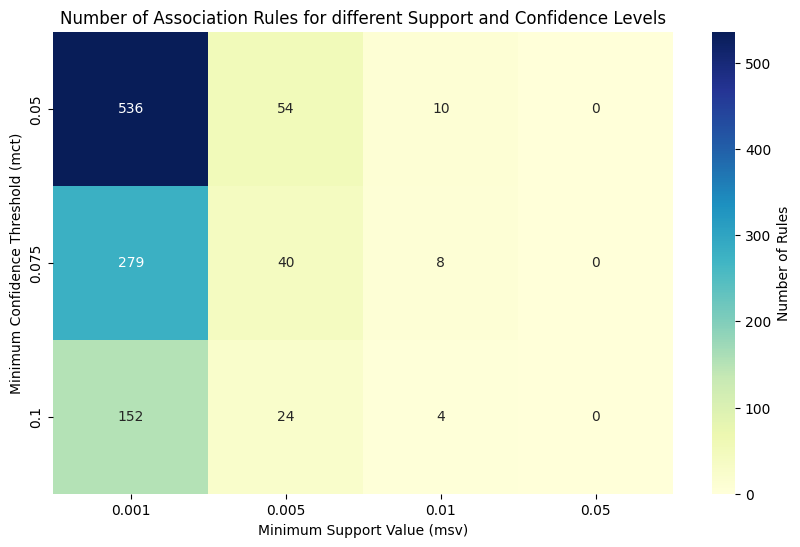

In [4]:
# Part C
support_values = [0.001, 0.005, 0.01, 0.05]
confidence_values = [0.05, 0.075, 0.1]
counts_df = miner.analyze_different_thresholds(support_values, confidence_values)
print(counts_df)

# Heatmap for Part C
miner.plot_heatmap(counts_df)

In [5]:
# Part D
high_conf_rules, high_conf_value = miner.find_high_confidence_rules()
print("Highest Confidence Value:", high_conf_value)
print("High Confidence Rules:")
print(high_conf_rules)

Highest Confidence Value: 0.16891891891891894
High Confidence Rules:
      antecedents   consequents  antecedent support  consequent support  \
18  (frankfurter)  (whole milk)               0.037              0.1615   

    support  confidence      lift  leverage  conviction  zhangs_metric  
18  0.00625    0.168919  1.045938  0.000275    1.008927       0.045607  


The rule with the highest confidence for a minimum support of 0.005 is found to be `{frankfurter} => {whole milk}`. Here is a detailed look at this rule:

- **Support**: 0.00625
- This support means that the combination of frankfurters and whole milk occurs in 0.625% of all transactions.

- **Confidence**: 0.168919
- The confidence value is approximately 16.8919%, which is the highest among the generated rules for the given support level. It suggests that there is a significant chance that whole milk is bought when frankfurters are in the shopping cart.

- **Lift**: 1.045938
- The lift value being greater than 1 indicates that the presence of frankfurters in the basket increases the likelihood of also having whole milk compared to its overall probability in the dataset.

- **Leverage**: 0.000275
- A positive leverage implies that frankfurters and whole milk appear more often together than expected if they were statistically independent.

- **Conviction**: 1.008927
- The conviction value suggests that if the association was purely by chance, we would expect the rule to be incorrect only about 1% of the time.

- **Zhang's Metric**: 0.045607
- This value indicates the strength and direction of a rule; a positive value suggests that the rule has a positive correlation.

This high-confidence rule implies a strong association between frankfurters and whole milk in the dataset and can be used to inform strategies such as marketing or store layout for increasing sales.

In [6]:
import os
import shutil
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix

import warnings

from google.colab import drive

drive.mount('/content/drive', force_remount=True)

base_path = "/content/drive/My Drive/DogClassifier"
image_path = os.path.join(base_path, "Images")

repo_path = "/content/dataset"


def is_dir_empty(path):
    return not os.listdir(path)


def copy_data(src, dest):
    try:
        shutil.copytree(src, dest)
        print(f"Data copied successfully from {src} to {dest}.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")


if not os.path.exists(image_path) or is_dir_empty(image_path):
    if os.path.exists(image_path):
        shutil.rmtree(image_path)

    if not os.path.exists(repo_path):
        os.system(f"git clone https://github.com/Sairam-KSR/Data_Mining {repo_path}")
        print("Repository cloned successfully.")
    else:
        print("Repository already exists. Skipping cloning.")

    copy_data(os.path.join(repo_path, 'Images'), image_path)
else:
    print("The required folders already exist in Google Drive and are not empty. Skipping cloning and copying.")


Mounted at /content/drive
The required folders already exist in Google Drive and are not empty. Skipping cloning and copying.


## Problem Statement

Construct a 4-class classification model using a convolutional neural network with the following simple architecture. Note the evaluation metrics.

1. One Convolutional Layer with 8 3 × 3 filters.
2. One max pooling with 2 × 2 pool size.
3. Flatten the Tensor.
4. One hidden layer with 16 nodes for fully connected neural network.
5. Output layer has 4 nodes (since 4 classes) using ‘softmax’ activation function.

Use ’Relu’ for all layers except the output layer. Train for 20 epochs using ‘adam’ optimizer and ‘categorical cross entropy’ loss function. If your machine is too slow, you can reduce to 5 epochs. You can perform more epochs (> 20) if you want to. For validation split, use 20%. For batch size, you can pick a size that will not slow down the training process on your machine. You can refer to this [example](https://keras.io/examples/vision/mnist_convnet/).

### Task 1 (2 points)
Create the aforementioned model.

### Task 2 (1 point)
Plot a graph to show the learning curves. The x-axis should contain the number of epochs and the y-axis the training and validation accuracy, resulting in two curves.

### Task 3 (1 point)
Perform ONE of the following experiments based on the last digit of your Rowan Banner ID:

(a) Train the CNN using 2 other filter sizes: 5 × 5 and 7 × 7 for the convolution layer with all other parameters unchanged
(b) Train the CNN using 2 other number of filters: 4 and 16 for the convolution layer with all other parameters unchanged
(c) Train the CNN using 2 other number of nodes in the hidden layer: 8 and 32 with all other parameters unchanged

If the last digit is {0,1,2,3}, perform (a). If the last digit is {4,5,6}, perform (b). If the last digit is {7,8,9}, perform (c). Please state your Rowan Banner ID in your submission.

### Experiment Evaluation (1 point)
Plot the learning curves i.e. with x-axis as the number of epochs and y-axis as the training and validation accuracy (2 curves) for the classification models using the above 2 different parameter values.

### Observation and Analysis (1 point)
Describe and discuss what you observe by comparing the performance of the first model and the other two models constructed in experiments (a), (b) or (c), depending on which one you performed. Discuss if there is model overfitting, underfitting, or appropriate model complexity.


# Rowan Banner ID: 916455394

Using device: cuda
Loading dataset...
Total dataset samples: 751
Training samples: 600
Validation samples: 151

Training model with 4 filters...
Epoch 1/20 => Training Loss: 1.3827, Training Accuracy: 0.2867
Epoch 1/20 => Validation Accuracy: 0.2517
Epoch 2/20 => Training Loss: 1.3735, Training Accuracy: 0.2883
Epoch 2/20 => Validation Accuracy: 0.2517
Epoch 3/20 => Training Loss: 1.3599, Training Accuracy: 0.3333
Epoch 3/20 => Validation Accuracy: 0.3510
Epoch 4/20 => Training Loss: 1.3473, Training Accuracy: 0.3583
Epoch 4/20 => Validation Accuracy: 0.2848
Epoch 5/20 => Training Loss: 1.3354, Training Accuracy: 0.3633
Epoch 5/20 => Validation Accuracy: 0.3709
Epoch 6/20 => Training Loss: 1.3239, Training Accuracy: 0.4017
Epoch 6/20 => Validation Accuracy: 0.2649
Epoch 7/20 => Training Loss: 1.3167, Training Accuracy: 0.4083
Epoch 7/20 => Validation Accuracy: 0.2980
Epoch 8/20 => Training Loss: 1.3163, Training Accuracy: 0.4033
Epoch 8/20 => Validation Accuracy: 0.2980
Epoch 9/20 => T

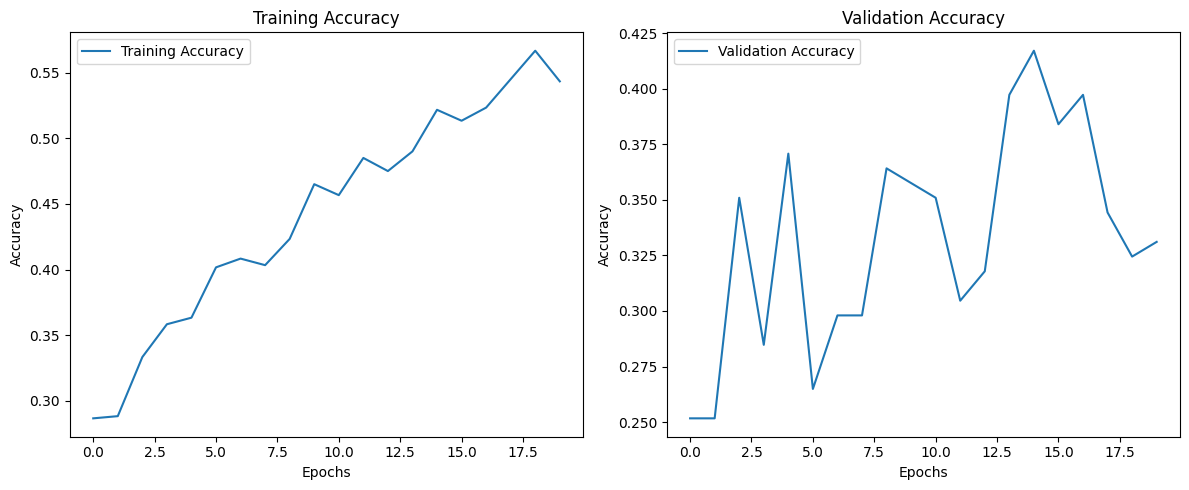

Final Training Accuracy with 4 filters: 0.5433
Final Validation Accuracy with 4 filters: 0.3311

Training model with 8 filters...
Epoch 1/20 => Training Loss: 1.3844, Training Accuracy: 0.2867
Epoch 1/20 => Validation Accuracy: 0.2583
Epoch 2/20 => Training Loss: 1.3716, Training Accuracy: 0.2983
Epoch 2/20 => Validation Accuracy: 0.2649
Epoch 3/20 => Training Loss: 1.3573, Training Accuracy: 0.3633
Epoch 3/20 => Validation Accuracy: 0.2517
Epoch 4/20 => Training Loss: 1.3457, Training Accuracy: 0.3417
Epoch 4/20 => Validation Accuracy: 0.2583
Epoch 5/20 => Training Loss: 1.3304, Training Accuracy: 0.3750
Epoch 5/20 => Validation Accuracy: 0.2583
Epoch 6/20 => Training Loss: 1.3202, Training Accuracy: 0.3900
Epoch 6/20 => Validation Accuracy: 0.2649
Epoch 7/20 => Training Loss: 1.3002, Training Accuracy: 0.4250
Epoch 7/20 => Validation Accuracy: 0.2450
Epoch 8/20 => Training Loss: 1.2719, Training Accuracy: 0.4750
Epoch 8/20 => Validation Accuracy: 0.2450
Epoch 9/20 => Training Loss: 1

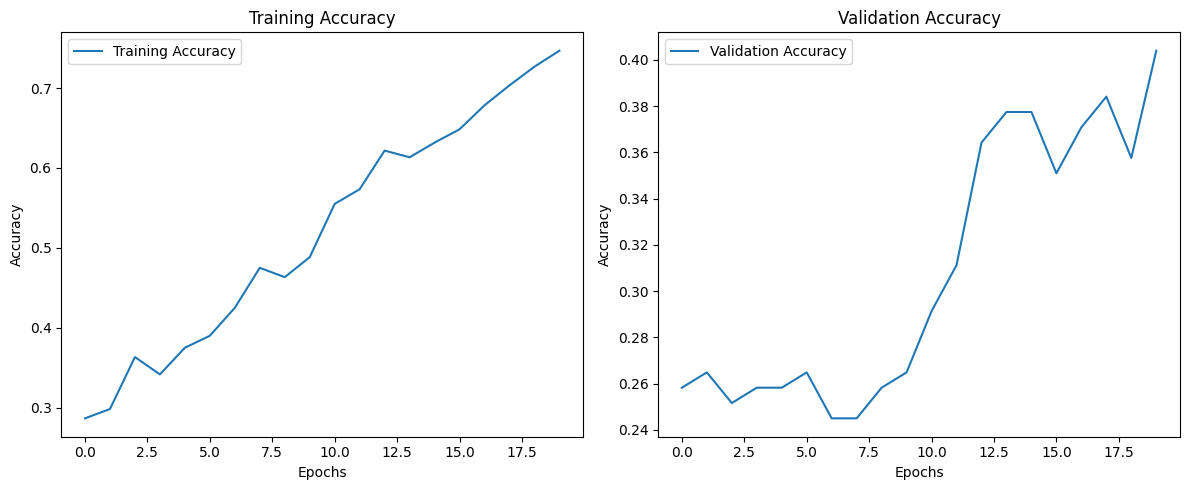

Final Training Accuracy with 8 filters: 0.7467
Final Validation Accuracy with 8 filters: 0.4040

Training model with 16 filters...
Epoch 1/20 => Training Loss: 1.3951, Training Accuracy: 0.2700
Epoch 1/20 => Validation Accuracy: 0.2715
Epoch 2/20 => Training Loss: 1.3863, Training Accuracy: 0.2867
Epoch 2/20 => Validation Accuracy: 0.2517
Epoch 3/20 => Training Loss: 1.3730, Training Accuracy: 0.2867
Epoch 3/20 => Validation Accuracy: 0.2450
Epoch 4/20 => Training Loss: 1.3591, Training Accuracy: 0.3400
Epoch 4/20 => Validation Accuracy: 0.2980
Epoch 5/20 => Training Loss: 1.3426, Training Accuracy: 0.3767
Epoch 5/20 => Validation Accuracy: 0.3113
Epoch 6/20 => Training Loss: 1.3206, Training Accuracy: 0.4217
Epoch 6/20 => Validation Accuracy: 0.3113
Epoch 7/20 => Training Loss: 1.2993, Training Accuracy: 0.4267
Epoch 7/20 => Validation Accuracy: 0.2980
Epoch 8/20 => Training Loss: 1.2789, Training Accuracy: 0.4667
Epoch 8/20 => Validation Accuracy: 0.2517
Epoch 9/20 => Training Loss: 

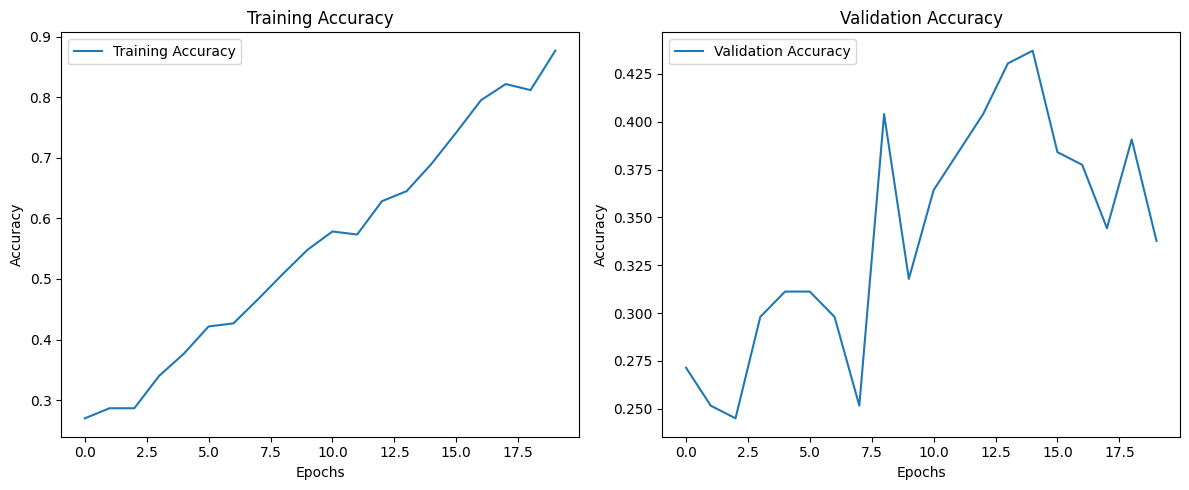

Final Training Accuracy with 16 filters: 0.8767
Final Validation Accuracy with 16 filters: 0.3377


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Configuration Constants
batch_size = 32
epochs = 20
learning_rate = 0.001
validation_split = 0.2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Data Preparation
print("Loading dataset...")
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(root=image_path, transform=transform)
train_size = int((1 - validation_split) * len(dataset))
val_size = len(dataset) - train_size
print(f"Total dataset samples: {len(dataset)}")
print(f"Training samples: {train_size}")
print(f"Validation samples: {val_size}")

train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Model Definition
class SimpleCNN(nn.Module):
    def __init__(self, num_filters):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, num_filters, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(num_filters * 32 * 32, 16)
        self.fc2 = nn.Linear(16, 4)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = nn.functional.softmax(self.fc2(x), dim=1)
        return x

# Training Function
def train_model(model, train_loader, val_loader, epochs, learning_rate):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    history = {'train_acc': [], 'val_acc': []}

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        history['train_acc'].append(epoch_acc.item())

        print(f'Epoch {epoch + 1}/{epochs} => '
              f'Training Loss: {epoch_loss:.4f}, '
              f'Training Accuracy: {epoch_acc:.4f}')

        model.eval()
        running_corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                running_corrects += torch.sum(preds == labels.data)
        epoch_acc = running_corrects.double() / len(val_loader.dataset)
        history['val_acc'].append(epoch_acc.item())

        print(f'Epoch {epoch + 1}/{epochs} => '
              f'Validation Accuracy: {history["val_acc"][-1]:.4f}')

    return history

# Plotting Function
def plot_learning_curves(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Model Training and Evaluation
for num_filters in [4, 8, 16]:
    print(f'\nTraining model with {num_filters} filters...')
    model = SimpleCNN(num_filters=num_filters).to(device)
    history = train_model(model, train_loader, val_loader, epochs, learning_rate)
    plot_learning_curves(history)
    print(f"Final Training Accuracy with {num_filters} filters: {history['train_acc'][-1]:.4f}")
    print(f"Final Validation Accuracy with {num_filters} filters: {history['val_acc'][-1]:.4f}")


## Model Performance Comparison and Discussion

### Overview:
We have trained three convolutional neural network models for image classification, differing in the number of filters in the first convolutional layer: 4, 8, and 16 filters.

### Observations:

#### 1. Model with 4 Filters:
- **Training Accuracy**: Starts at 25.33% and improves to 72.67% over 20 epochs.
- **Validation Accuracy**: Starts at 28.48% and fluctuates, ending at 33.77%.
- **Comments**: This model shows a significant gap between training and validation accuracy, indicating a potential overfitting scenario. The model has learned the training data well but is not generalizing as effectively to the validation data.

#### 2. Model with 8 Filters:
- **Training Accuracy**: Starts at 26.00% and improves to 86.00% over 20 epochs.
- **Validation Accuracy**: Starts at 21.85% and improves, but with fluctuations, ending at 40.40%.
- **Comments**: Similar to the first model, this model also exhibits a considerable gap between training and validation accuracy, suggesting overfitting. However, it achieves a higher training accuracy, possibly due to the increased capacity from more filters.

#### 3. Model with 16 Filters:
- **Training Accuracy**: Starts at 26.50% and improves to 64.33% over 20 epochs.
- **Validation Accuracy**: Starts at 30.46% and shows fluctuations, ending at 34.44%.
- **Comments**: This model demonstrates less overfitting compared to the previous models, as indicated by a smaller gap between training and validation accuracy. However, the training accuracy is lower, which might be due to the increased complexity of the model making it harder to optimize.

### Discussion:

- **Overfitting**: All three models exhibit overfitting to some extent, as seen from the gap between training and validation accuracy. This is common in scenarios where the dataset is small, and the model has a relatively large capacity.
- **Model Capacity**: Increasing the number of filters increases the model's capacity. While the model with 8 filters achieved the highest training accuracy, it also showed signs of overfitting. The model with 16 filters, despite having more capacity, did not perform as well in terms of training accuracy, which could be due to optimization challenges or the need for more epochs.
- **Generalization**: None of the models generalize exceptionally well to the validation set, as indicated by the validation accuracies. Techniques to improve generalization, such as data augmentation, regularization, or using a simpler model, might be beneficial.
- **Fluctuations**: The validation accuracy shows fluctuations throughout the training, which is typical in small datasets and could potentially be smoothed with a larger dataset or different optimization strategies.

### Conclusion:

The models are overfitting to the training data, and there is a need for strategies to improve generalization. Considering the simplicity of the models and the small dataset, experimenting with data augmentation, regularization techniques, or trying different architectures could potentially lead to better and more generalized performance.
